用别的方法来导入word2vec或者glove预训练词向量
https://blog.csdn.net/sir_TI/article/details/105728592?utm_medium=distribute.pc_relevant.none-task-blog-title-6&spm=1001.2101.3001.4242

In [1]:
import torch
import gensim
import torch.nn as nn


wvmodel = gensim.models.KeyedVectors.load_word2vec_format('text_train_vectors_wd2.txt', binary=False)
# 需要在字典的位置加上1是需要给UNK添加一个位置
vocab_size=len(wvmodel.vocab)+1
vector_size=wvmodel.vector_size
print(vocab_size)
print(vector_size)

weight = torch.randn(vocab_size, vector_size)   # 随机生成weight 二位的建立一个随机的权重矩阵 


words=wvmodel.wv.vocab
#print(words)  #这个words是一个字典 里面是词和对应的向量 
# {'3750': <gensim.models.keyedvectors.Vocab object at 0x7f902e4b43c8>, 
#  '648': <gensim.models.keyedvectors.Vocab object at 0x7f902e4b4e10>, 
#  '900': <gensim.models.keyedvectors.Vocab object at 0x7f902e4b4d30>,


word_to_idx = {word: i+1 for i, word in enumerate(words)}
# 定义了一个unknown的词.
word_to_idx['<unk>'] = 0 
#print(word_to_idx)  #{'3750': 1, '648': 2, '900': 3, '3370': 4,


idx_to_word = {i+1: word for i, word in enumerate(words)}
idx_to_word[0] = '<unk>' 
#print(idx_to_word)  #{1: '3750', 2: '648', 3: '900', 4: '3370', 5: '4464', 6: '6122'


for i in range(len(wvmodel.index2word)): #print(len(wvmodel.index2word)):3126
    try:                                 #print(wvmodel.index2word):['3750', '648', '900', '3370', '4464', '6122', '7399', '4939', 
        index = word_to_idx[wvmodel.index2word[i]]
        #从所有的单词列表中按照这个i下标把单词拿出来 ，再从这个word_to_idx 元组中把单词的下标拿出来
    except:
        continue
    vector=wvmodel.wv.get_vector(idx_to_word[word_to_idx[wvmodel.index2word[i]]])
#根据这个索引得到这个单词 再得到这个单词的向量 #index = word_to_idx[wvmodel.index2word[i]]
    weight[index, :] = torch.from_numpy(vector)  #torch.from_numpy这个方法将numpy类转换成tensor类
    # 把这个vector这个向量转化成tensor类型 然后赋值到这个初始化的随机矩阵中，


3217
300


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
embedding = nn.Embedding.from_pretrained(weight,freeze=True)
print(embedding)

Embedding(3217, 300)


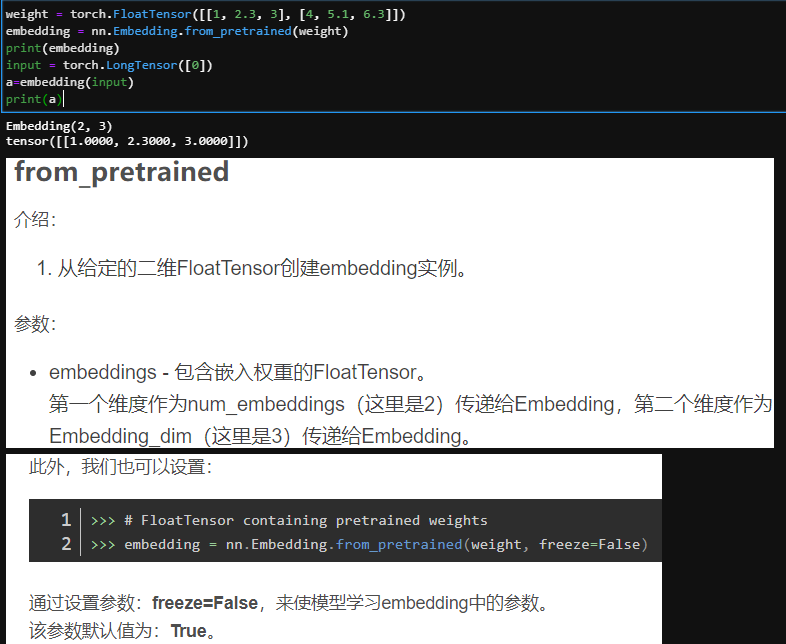

torch.nn.Embeding 的作用是随机初始化词向量，跟word2vec和glove作用是一样啊 所以这个很垃圾 一般不要用 
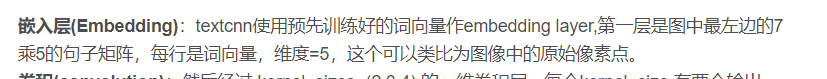